In [105]:
import pandas as pd
import numpy as np
from scipy import stats

# import data
df = pd.read_csv('processed.csv')

# drop unnecessary columns
df.drop(labels=["index","pha"], axis=1, inplace=True)

# replace Y/N with 1/0
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})

# type cast data
df = df.astype(float)

# remove outliers
for column in df:
    if column not in ["orbit_condition_code","diameter","neo"]:
        df=df[(np.abs(stats.zscore(df[column])) < 3)]

# normalize data
def min_max_scaling(column):
    return (column-column.min())/(column.max()-column.min())
for column in df.columns:
    if column != 'diameter':
        df[column]=min_max_scaling(df[column])

# shuffle dataframe
df = df.sample(frac = 1)

# split dataframe into train and test
split_index = int(df.shape[0] * 0.8)
df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]

# split train and test into X and Y
Y_train = df_train['diameter']
Y_test = df_test['diameter']
X_train = df_train.drop(labels='diameter',axis=1)
X_test = df_test.drop(labels='diameter',axis=1)

/var/folders/bd/kfz6tvds4_bfgj09gr0wlj780000gn/T/ipykernel_25152/3339123711.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('processed.csv')


In [106]:
Y_test.max()

28.999

In [75]:
from data_processing import *

import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [76]:
model=MLPRegressor(learning_rate_init=0.002, max_iter=300)
model.fit(X_train, Y_train)

MLPRegressor(learning_rate_init=0.002, max_iter=300)

In [77]:
mae = metrics.mean_absolute_error(Y_train, model.predict(X_train))
mse = metrics.mean_squared_error(Y_train, model.predict(X_train))
rsq = metrics.r2_score(Y_train, model.predict(X_train))
print(mae, mse, rsq)

mae = metrics.mean_absolute_error(Y_test, model.predict(X_test))
mse = metrics.mean_squared_error(Y_test, model.predict(X_test))
rsq = metrics.r2_score(Y_test, model.predict(X_test))
print(mae, mse, rsq)

print(model.predict(X_test)[:10])
print(np.array(Y_test)[:10])

0.29374571683988027 0.19193378874970174 0.9561535822754476
0.3027439213766284 0.21363564908257518 0.9524996243899969
[5.72219283 8.4650949  3.97433548 4.45420646 5.7679854  4.93219678
 1.99145095 1.85337761 4.60763804 2.32286455]
[5.539 7.91  3.499 4.08  5.961 4.605 1.936 1.932 4.954 2.363]


In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=400, max_features=5, max_depth=6)
rf_reg.fit(X_train, Y_train)
pred = rf_reg.predict(X_test)

print('Training Accuracy : ' , rf_reg.score(X_train, Y_train))
print('Test Accuracy : ' , rf_reg.score(X_test, Y_test))

Training Accuracy :  0.9128338610984894
Test Accuracy :  0.9089099568138201


In [79]:
mse = metrics.r2_score(pred, Y_test)
print(mse)
#print(pred)
print(pred[:10])
print(np.array(Y_test)[:10])
print(pred.shape)
print(Y_test.shape)

0.8776588388101622
[5.06689199 8.77600348 3.30538833 4.27849398 5.67640218 4.89907981
 2.07603195 2.36711911 4.07778034 2.93956784]
[5.539 7.91  3.499 4.08  5.961 4.605 1.936 1.932 4.954 2.363]
(24875,)
(24875,)


0.40968266568699


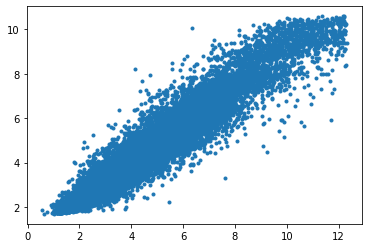

In [80]:
x = np.array(Y_test)
y = np.array(pred)
print(metrics.mean_squared_error(x, y))
plt.plot(x, y,linestyle='',marker='.')

plt.show()

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

# training
lr.fit(X_train,Y_train)

# predicting
Y_prediction_lr=lr.predict(X_test)

# scoring
score_lr=r2_score(Y_test,Y_prediction_lr)
score_lr

0.8527519227279667